<a href="https://colab.research.google.com/github/nlgandhi/LearnPython/blob/master/IB_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q pandas lightgbm
!pip install scikit-learn

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


# New Section

In [8]:
# Importing the dataset. 
dataset = pd.read_csv('IB_Train_Data.csv')
# This is the most important step. In this case we are reading the features
# that we want to train the model with. In this case its just Age and Estimated Salary.
X = dataset.iloc[:, [0, 9]].values
# This is the Label. In ths case the LABEL is Purchased
y = dataset.iloc[:, 10].values
print('Features Loaded into X and Labels loaded into Y')
# print(X)
# print(y)

Features Loaded into X and Labels loaded into Y


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print('Data Has Been Split')

Data Has Been Split


In [10]:
# Feature Scaling
# StandardScaler rescales each column to have 0 mean and 1 Standard Deviation.  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [12]:
# Start Here...
import lightgbm as lgb

# Load the Training Data Age and Salary and Label => Purchased
# First Parameter is the Training Data and the second Parameters is the label
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'dart' # dart
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [13]:
#Prediction
y_pred=clf.predict(x_test)
print(len(y_pred))

# for i in y_pred:
for i in range(len(y_pred)):  
    if y_pred[i]>=.5:       # setting threshold to .5
        y_pred[i]=1
    else:  
        y_pred[i]=0

print(y_pred)
#print(y_test)    

40925
[0. 0. 0. ... 0. 0. 0.]


In [18]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.7598289554062309


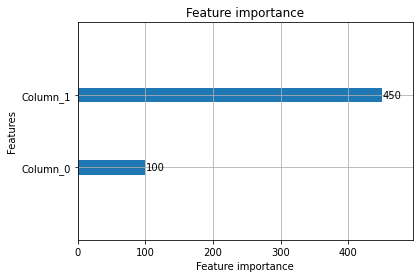

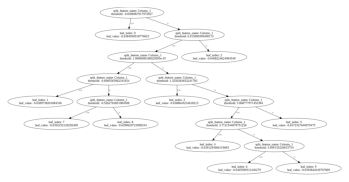

In [19]:
import matplotlib.pyplot as plt
import os

ax = lgb.plot_importance(clf, max_num_features=10)
plt.show()
 
ax = lgb.plot_tree(clf)
plt.show()
